<a href="https://colab.research.google.com/github/PyBastian/ComputacionGrafica/blob/master/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras-tuner --upgrade
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 5.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 4.2 MB/s 


In [ ]:
import zipfile
import math

from sklearn.preprocessing import LabelEncoder, StandardScaler

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pylab as plt

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

from sklearn.decomposition import PCA

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.calibration import CalibratedClassifierCV
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
from scipy import stats

from skopt import BayesSearchCV
from sklearn.linear_model import RidgeClassifier
from skopt.space import Real, Categorical

import os
import tensorflow as tf

from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras.layers import LSTM, Input, Dropout, Dense
from tensorflow.keras.models import Model
from sklearn.naive_bayes import BernoulliNB
import keras_tuner as kt

#warnings.filterwarnings('ignore')

In [ ]:
SEED = 42069

#Proyecto Introducción a la ciencia de datos: Higgs Boson Machine Learning Challenge

Integrantes: 



*   Nicole Gallardo
*   Diego Muñoz
*   Cristian Bernal
*   Bastián Vivar

Profesor: Juan Pavez




# Score

$\text{AMS} = \sqrt{2\left((s+b+b_r) \log \left(1 + \frac{s}{b + b_r}\right)-s\right)}$

donde s son los true positive del modelo entrenado y b son los false positive del mismo modelo.

#Parte 1: Visualizaciones y preprocesamiento

In [ ]:
zip = "data.zip"
import zipfile

with zipfile.ZipFile(zip,"r") as zip_ref:
    zip_ref.extractall("")

In [ ]:
df_training = pd.read_csv("training.csv")
df_test = pd.read_csv("test.csv")

##Visualización

### Dataframe

In [ ]:
df_training.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [ ]:
df_test.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
0,350000,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,...,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,1.380904,b,b,11.246677
1,350001,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,...,-0.553,-0.849,-999.000,-999.000,-999.000,47.575,0.782046,b,v,1.421938
2,350002,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,...,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,0.005721,s,v,0.010415
3,350003,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,...,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,0.005721,s,v,0.010415
4,350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,...,-1.013,-0.334,185.857,0.335,2.587,599.213,0.091770,b,v,0.166859


In [ ]:
print(pd.Series({"Tamaño training set": df_training.shape,
                 "Tamaño test set": df_test.shape}).to_string())

Tamaño training set    (250000, 33)
Tamaño test set        (550000, 35)


In [ ]:
print(df_training.columns.values,'\n \n', df_test.columns.values)

['EventId' 'DER_mass_MMC' 'DER_mass_transverse_met_lep' 'DER_mass_vis'
 'DER_pt_h' 'DER_deltaeta_jet_jet' 'DER_mass_jet_jet'
 'DER_prodeta_jet_jet' 'DER_deltar_tau_lep' 'DER_pt_tot' 'DER_sum_pt'
 'DER_pt_ratio_lep_tau' 'DER_met_phi_centrality' 'DER_lep_eta_centrality'
 'PRI_tau_pt' 'PRI_tau_eta' 'PRI_tau_phi' 'PRI_lep_pt' 'PRI_lep_eta'
 'PRI_lep_phi' 'PRI_met' 'PRI_met_phi' 'PRI_met_sumet' 'PRI_jet_num'
 'PRI_jet_leading_pt' 'PRI_jet_leading_eta' 'PRI_jet_leading_phi'
 'PRI_jet_subleading_pt' 'PRI_jet_subleading_eta' 'PRI_jet_subleading_phi'
 'PRI_jet_all_pt' 'Weight' 'Label'] 
 
 ['EventId' 'DER_mass_MMC' 'DER_mass_transverse_met_lep' 'DER_mass_vis'
 'DER_pt_h' 'DER_deltaeta_jet_jet' 'DER_mass_jet_jet'
 'DER_prodeta_jet_jet' 'DER_deltar_tau_lep' 'DER_pt_tot' 'DER_sum_pt'
 'DER_pt_ratio_lep_tau' 'DER_met_phi_centrality' 'DER_lep_eta_centrality'
 'PRI_tau_pt' 'PRI_tau_eta' 'PRI_tau_phi' 'PRI_lep_pt' 'PRI_lep_eta'
 'PRI_lep_phi' 'PRI_met' 'PRI_met_phi' 'PRI_met_sumet' 'PRI_jet_num'
 'PRI

Existen 2 grandes tipos de categoría de variable:


*   Las variables con prefijo **PRI** (de primitivo) son valores brutos (raw) acerca de las coliciones de las particulas entregados por el detector
*   Las variables con el prefijo **DER** (de derivado) son cantidades calculadas a partir de las características primitivas, que fueron seleccionadas por los físicos de ATLAS



### Naturaleza de variables

In [ ]:
print(df_training.dtypes)

EventId                          int64
DER_mass_MMC                   float64
DER_mass_transverse_met_lep    float64
DER_mass_vis                   float64
DER_pt_h                       float64
DER_deltaeta_jet_jet           float64
DER_mass_jet_jet               float64
DER_prodeta_jet_jet            float64
DER_deltar_tau_lep             float64
DER_pt_tot                     float64
DER_sum_pt                     float64
DER_pt_ratio_lep_tau           float64
DER_met_phi_centrality         float64
DER_lep_eta_centrality         float64
PRI_tau_pt                     float64
PRI_tau_eta                    float64
PRI_tau_phi                    float64
PRI_lep_pt                     float64
PRI_lep_eta                    float64
PRI_lep_phi                    float64
PRI_met                        float64
PRI_met_phi                    float64
PRI_met_sumet                  float64
PRI_jet_num                      int64
PRI_jet_leading_pt             float64
PRI_jet_leading_eta      

In [ ]:
print(df_test.dtypes)

EventId                          int64
DER_mass_MMC                   float64
DER_mass_transverse_met_lep    float64
DER_mass_vis                   float64
DER_pt_h                       float64
DER_deltaeta_jet_jet           float64
DER_mass_jet_jet               float64
DER_prodeta_jet_jet            float64
DER_deltar_tau_lep             float64
DER_pt_tot                     float64
DER_sum_pt                     float64
DER_pt_ratio_lep_tau           float64
DER_met_phi_centrality         float64
DER_lep_eta_centrality         float64
PRI_tau_pt                     float64
PRI_tau_eta                    float64
PRI_tau_phi                    float64
PRI_lep_pt                     float64
PRI_lep_eta                    float64
PRI_lep_phi                    float64
PRI_met                        float64
PRI_met_phi                    float64
PRI_met_sumet                  float64
PRI_jet_num                      int64
PRI_jet_leading_pt             float64
PRI_jet_leading_eta      

Lo primero que observamos es que todas las variables son de tipo float exceptuando el EventID y el PRI_jet_num que son valores enteros, además del Label y KaggleSet que son objetos

### Distribución de las columnas del DF

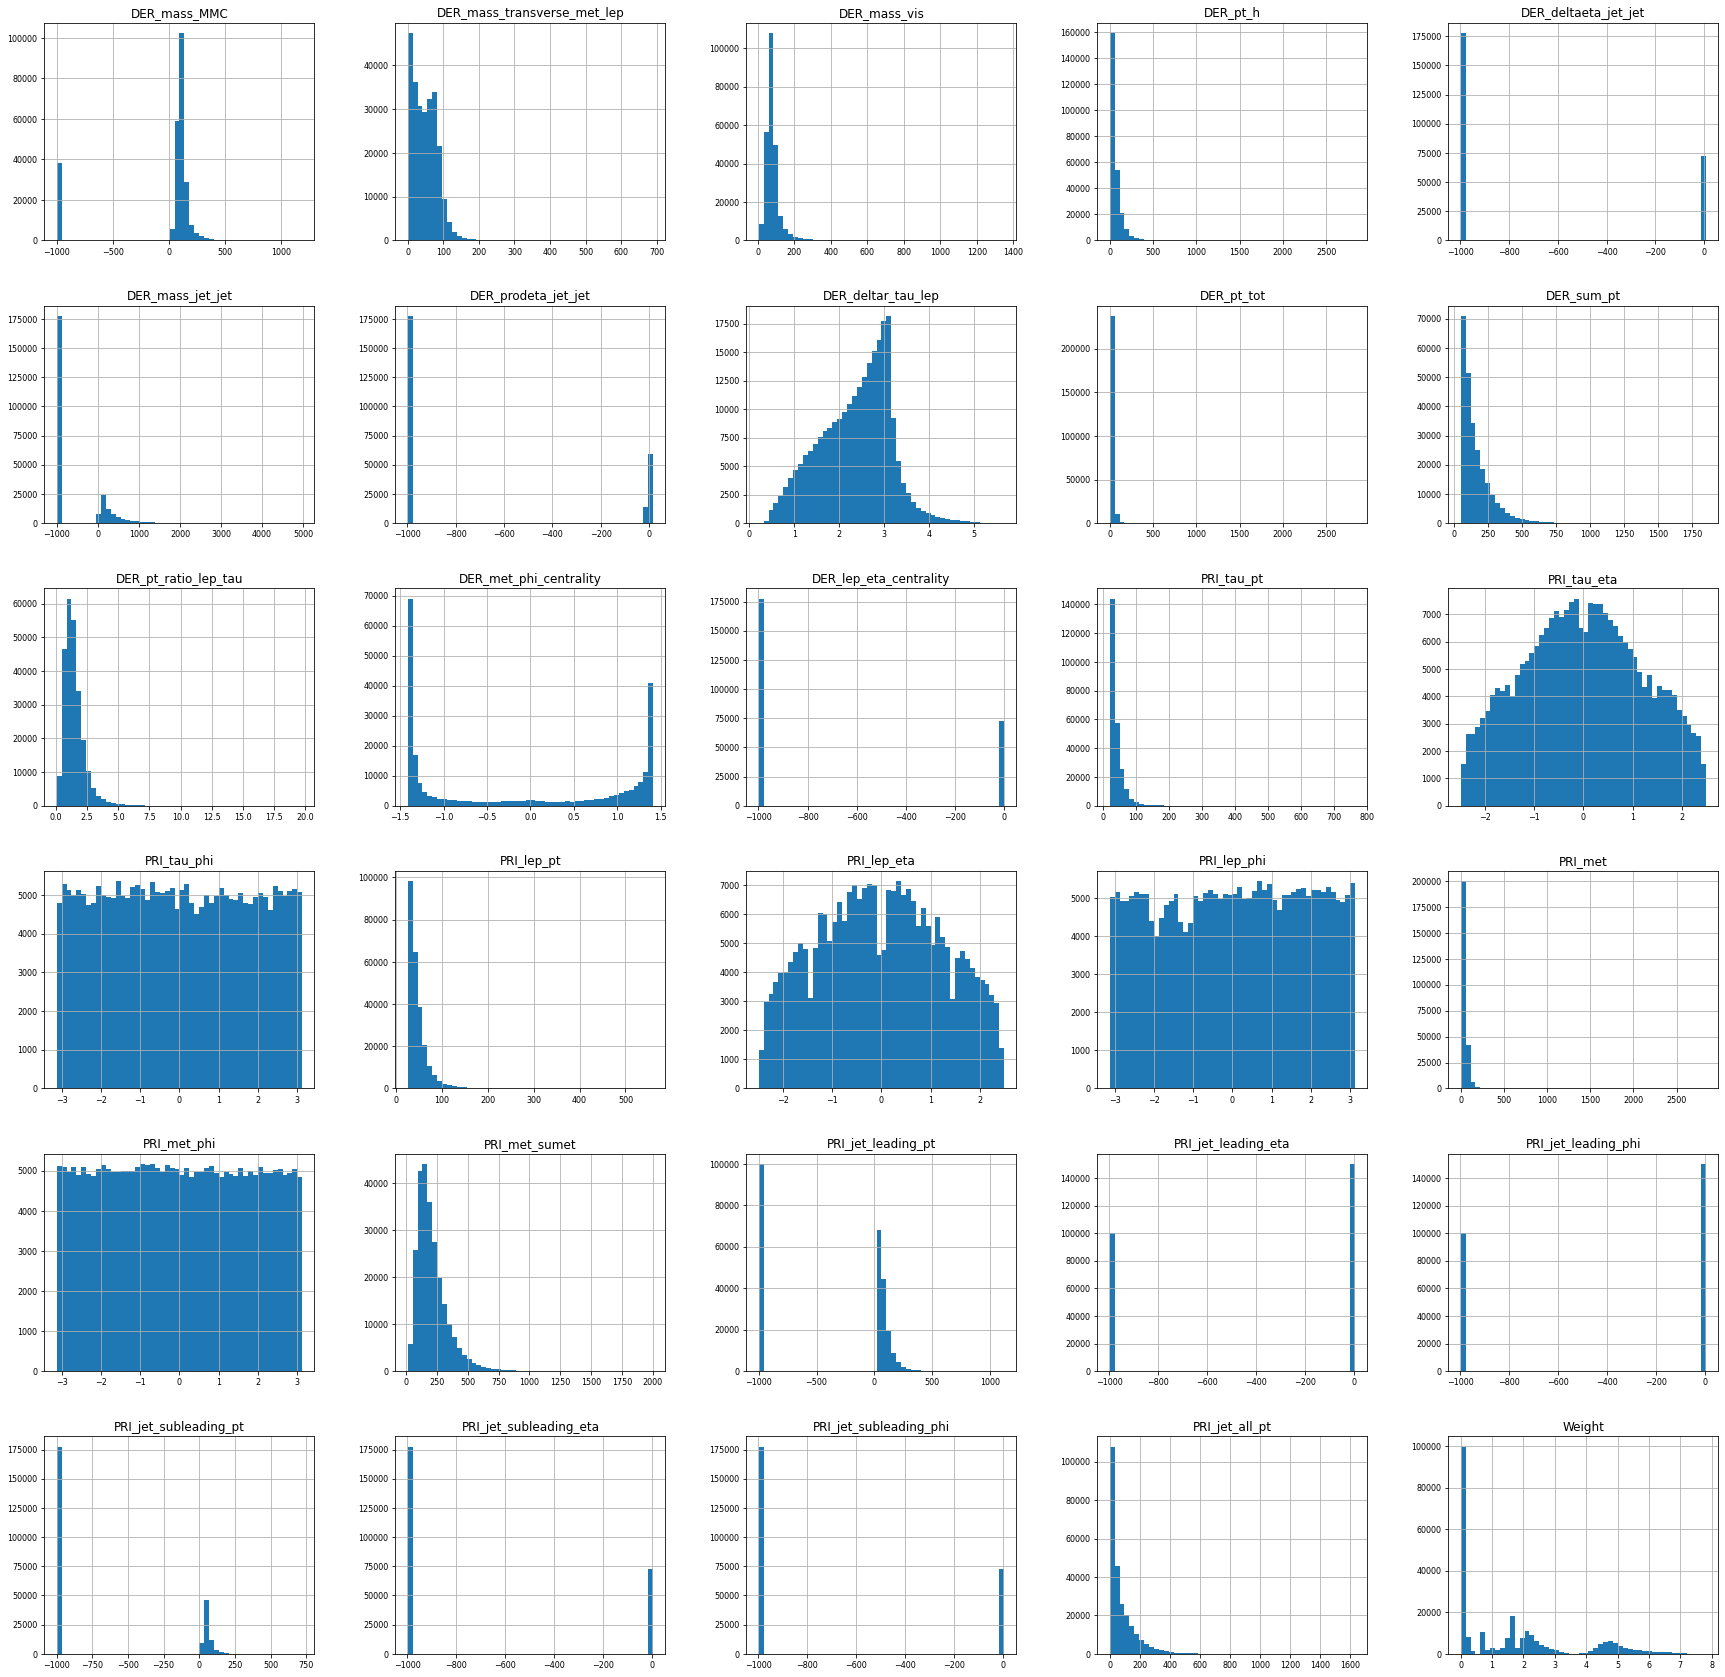

In [ ]:
training_float_columns = df_training.select_dtypes(include = ['float64'])
training_float_columns.hist(figsize=(30, 30), bins=50, xlabelsize=8, ylabelsize=8);

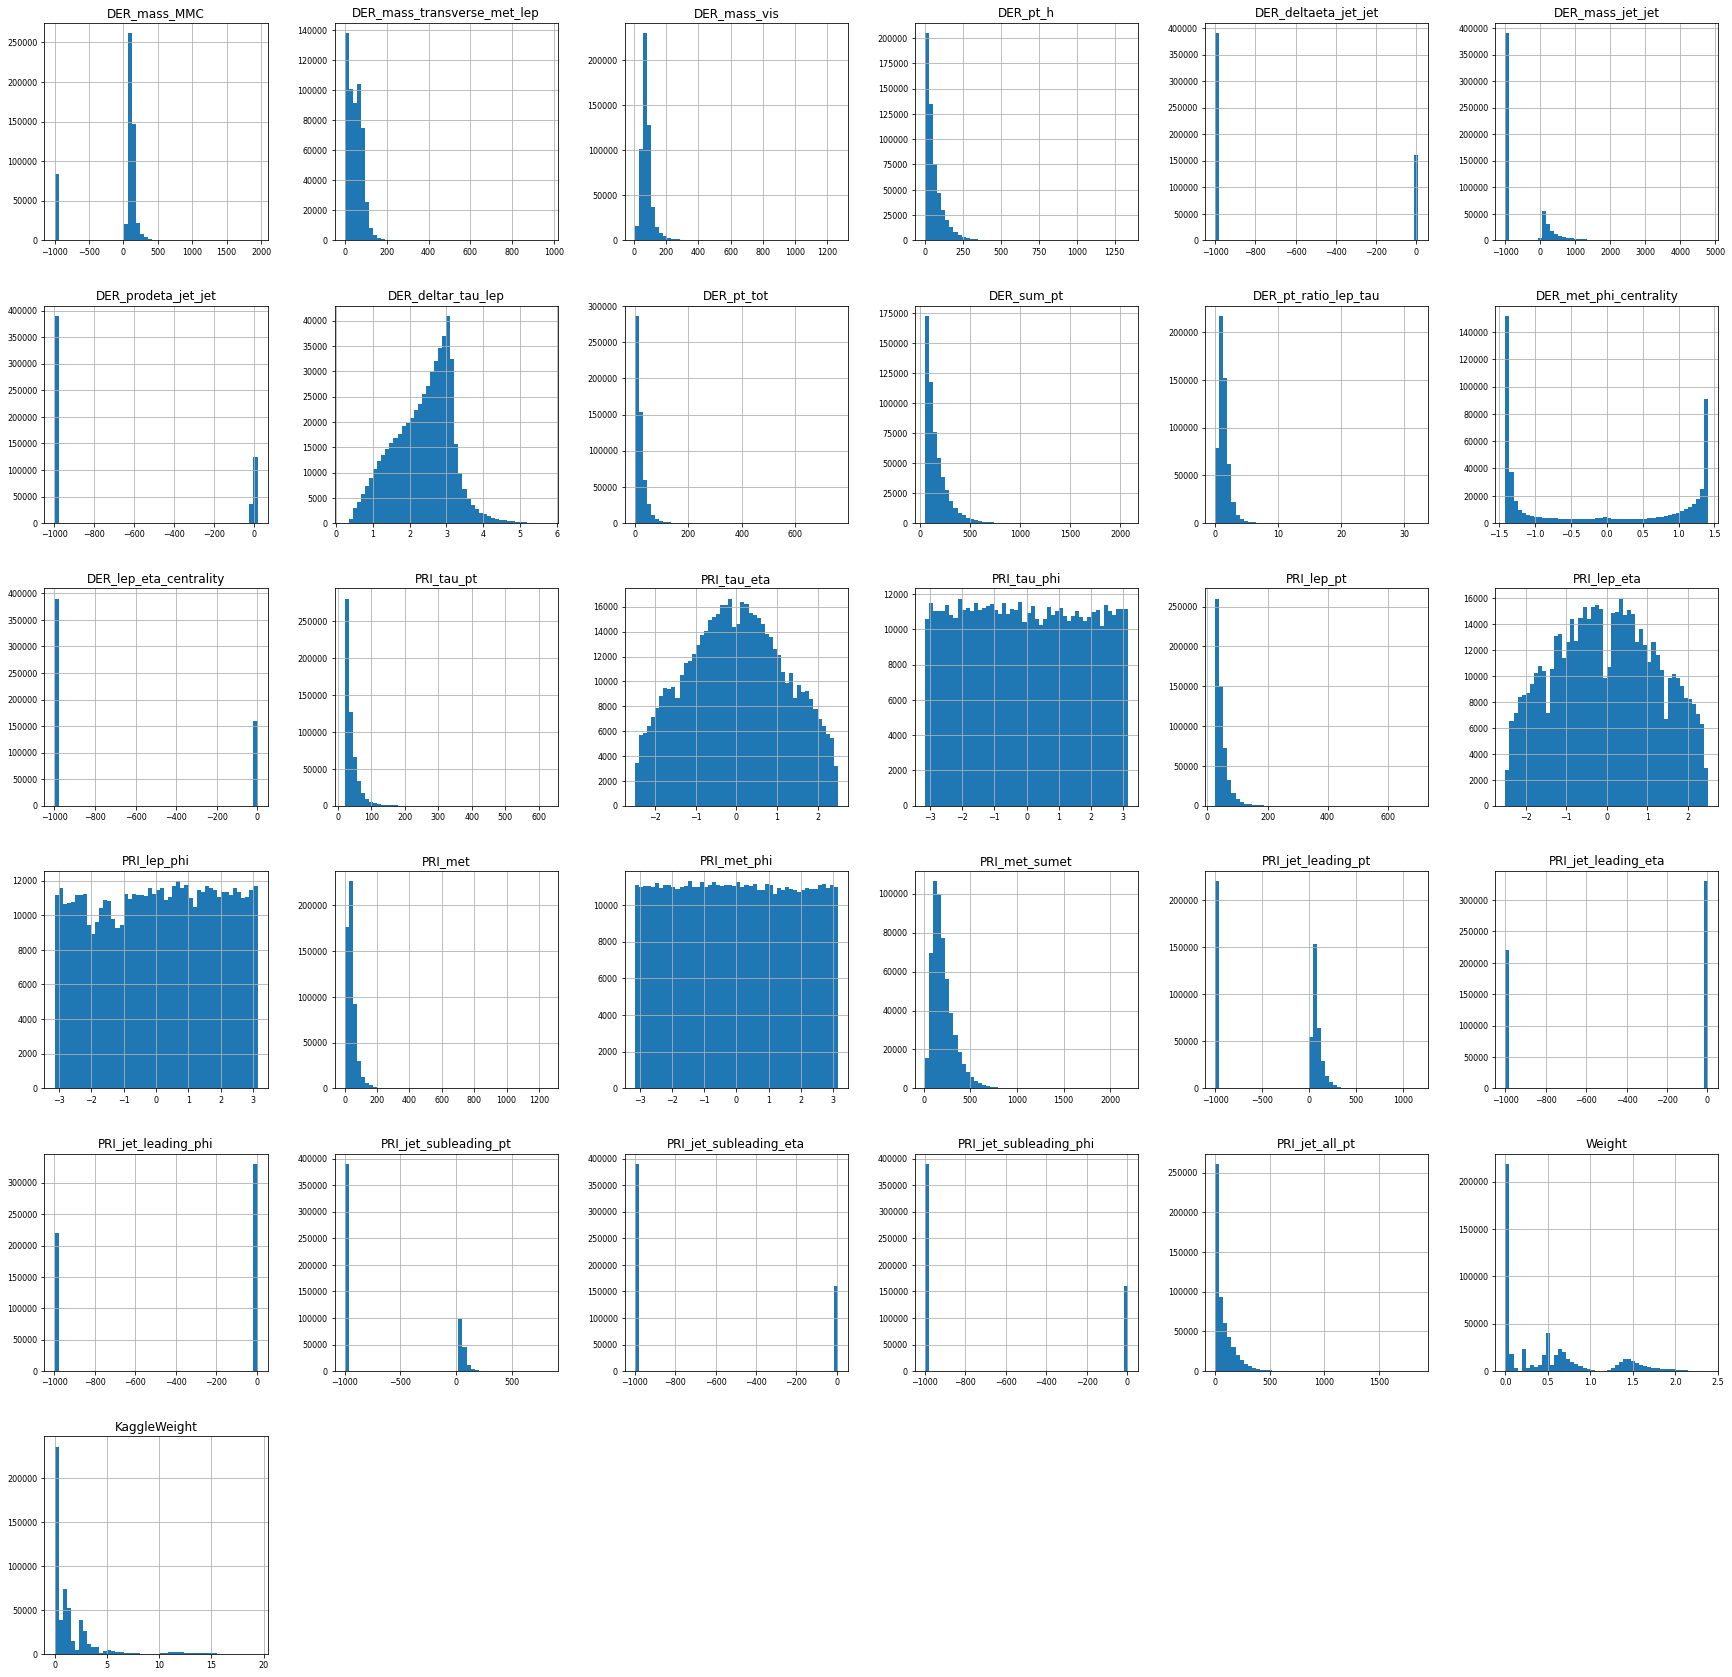

In [ ]:
test_float_columns = df_test.select_dtypes(include = ['float64'])
test_float_columns.hist(figsize=(30, 30), bins=50, xlabelsize=8, ylabelsize=8);

Lo que se observa principalmente es que en varias columnas de los dataframes de test y train hay valores anómalos repetidos. En la descripción del dataset se menciona específicamente que es posible que existan algunas variables que no tengan sentido o no se puedan calcular y se reemplazaron por un -999,0.

###Distribución del Label

Las particulas son clasificadas como: 

*   Signal (s)
*   Background (b)



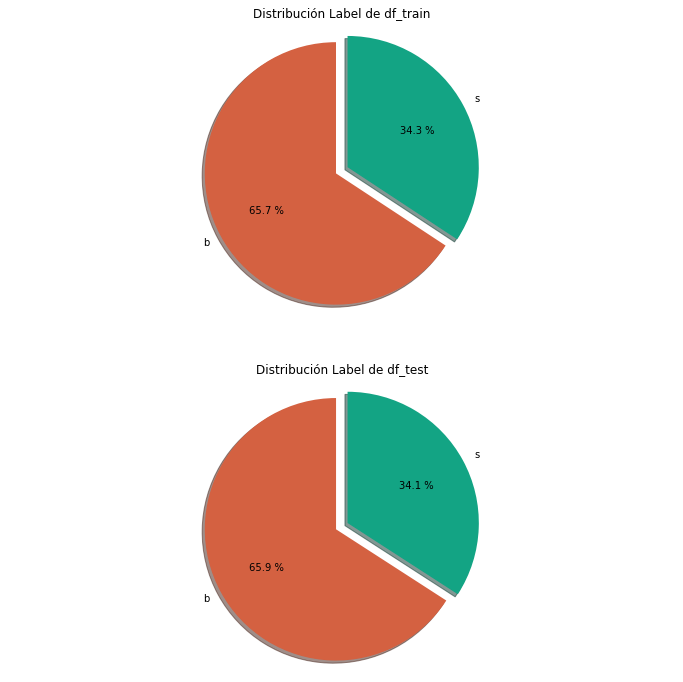

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
explode = (0, 0.1)

colors = ['#d46141','#13a484']

ax1.pie(df_training['Label'].value_counts().values, labels=df_training['Label'].value_counts().index, autopct="%0.1f %%" , shadow=True, startangle=90, explode=explode, colors=colors) 
ax1.axis("equal")
ax1.title.set_text('Distribución Label de df_train')
ax2.pie(df_test['Label'].value_counts().values, labels=df_test['Label'].value_counts().index, autopct="%0.1f %%", shadow=True, startangle=90, explode=explode, colors=colors)
ax2.axis("equal")
ax2.title.set_text('Distribución Label de df_test')
plt.show()

###Correlación

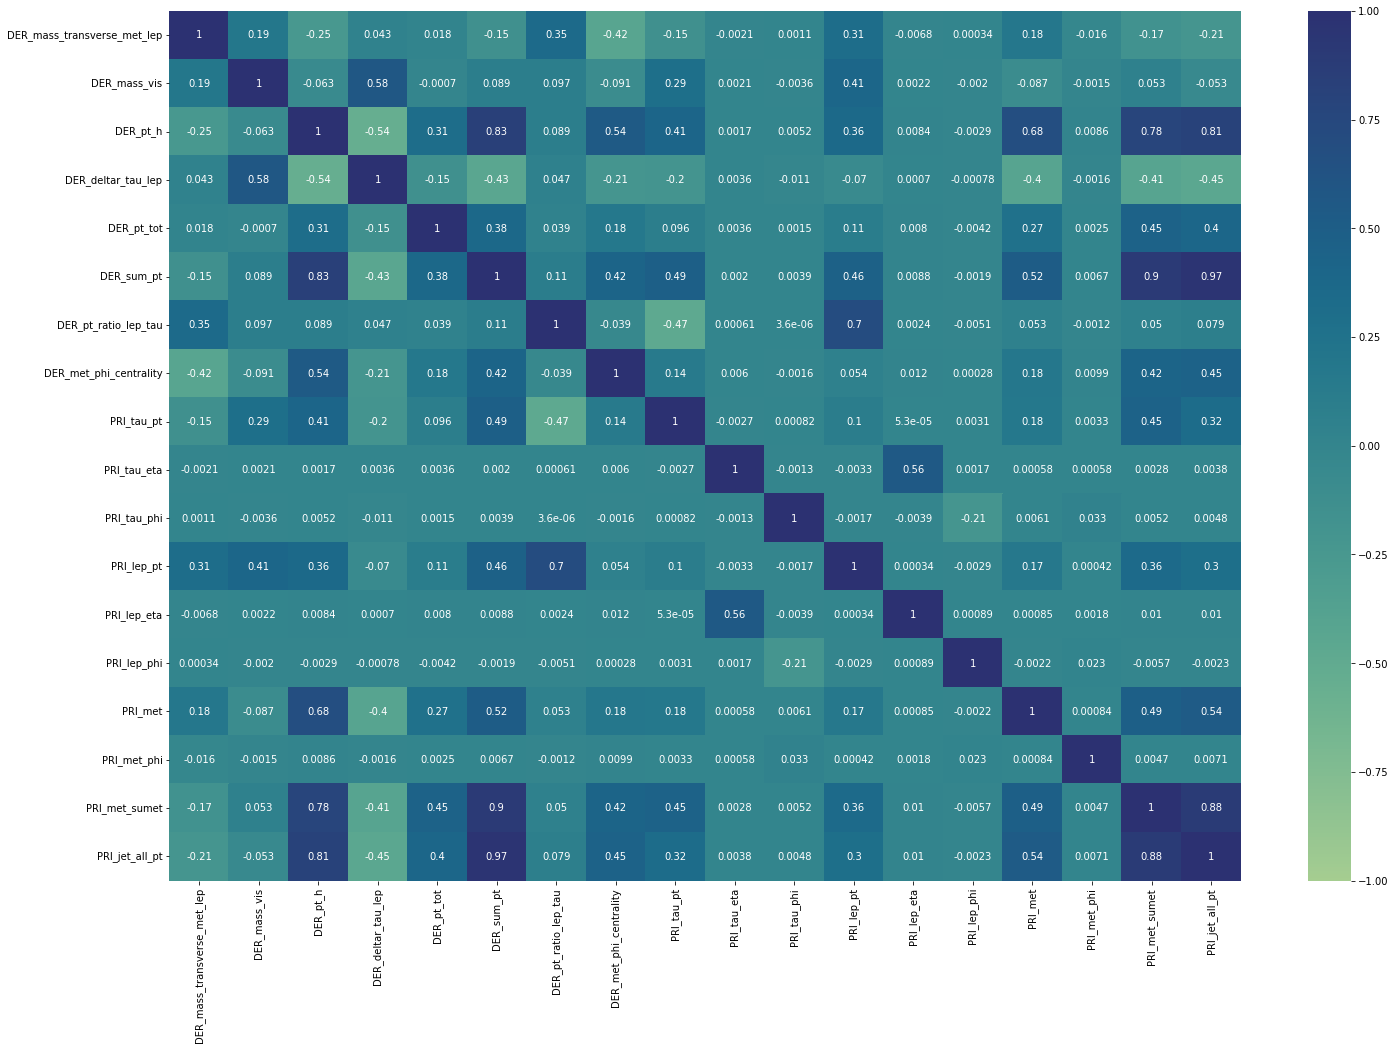

In [ ]:
cols_float_training = df_training.columns[df_training.dtypes == 'float64']
plt.figure(figsize = (24, 16))
sns.heatmap(df_training[cols_float_training].corr(), vmin = -1, vmax = 1, annot = True, cmap = sns.color_palette("crest", as_cmap=True))

###Valores -999

Como se mencionó arriba, existen valores en el dataset que son considerados no validos, los cuales son los que tienen el valor de -999. Se muestra a continuación las categirías que los tienen

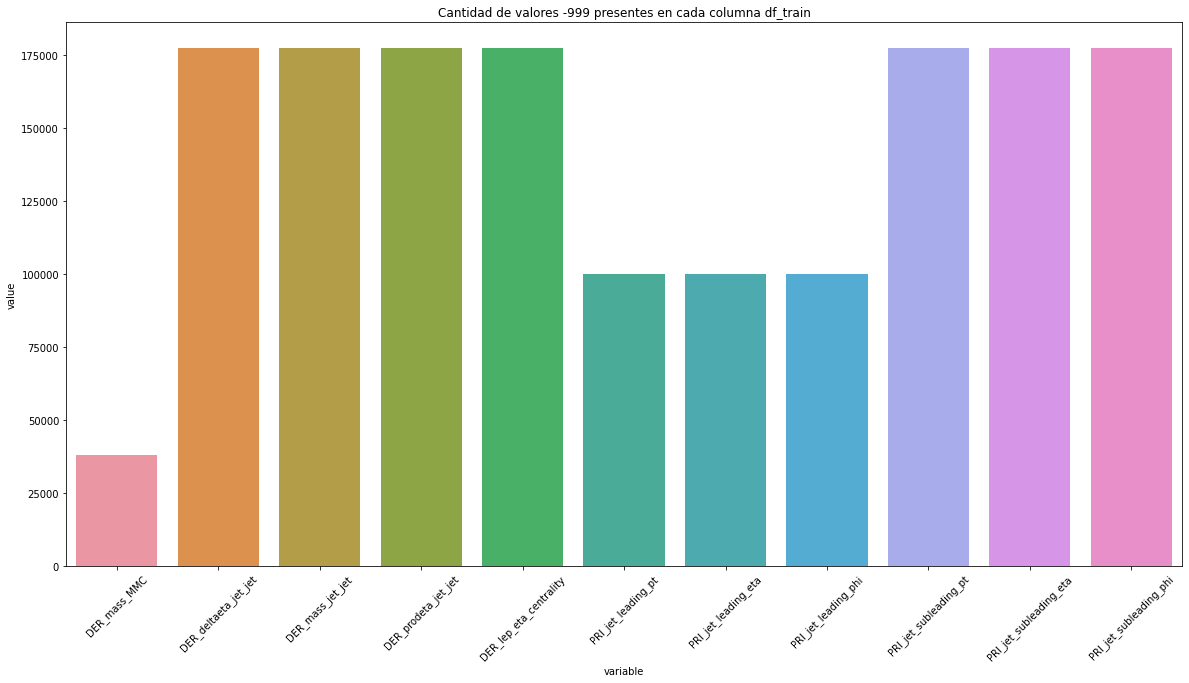

In [ ]:
count = df_training.apply(pd.value_counts).iloc[[0]].dropna(axis=1)
long_df = pd.melt(count)
plt.figure(figsize=(20, 10))
sns.barplot(y = long_df.value , x = long_df.variable)
plt.title("Cantidad de valores -999 presentes en cada columna df_train")
plt.xticks(rotation=45)
plt.show()

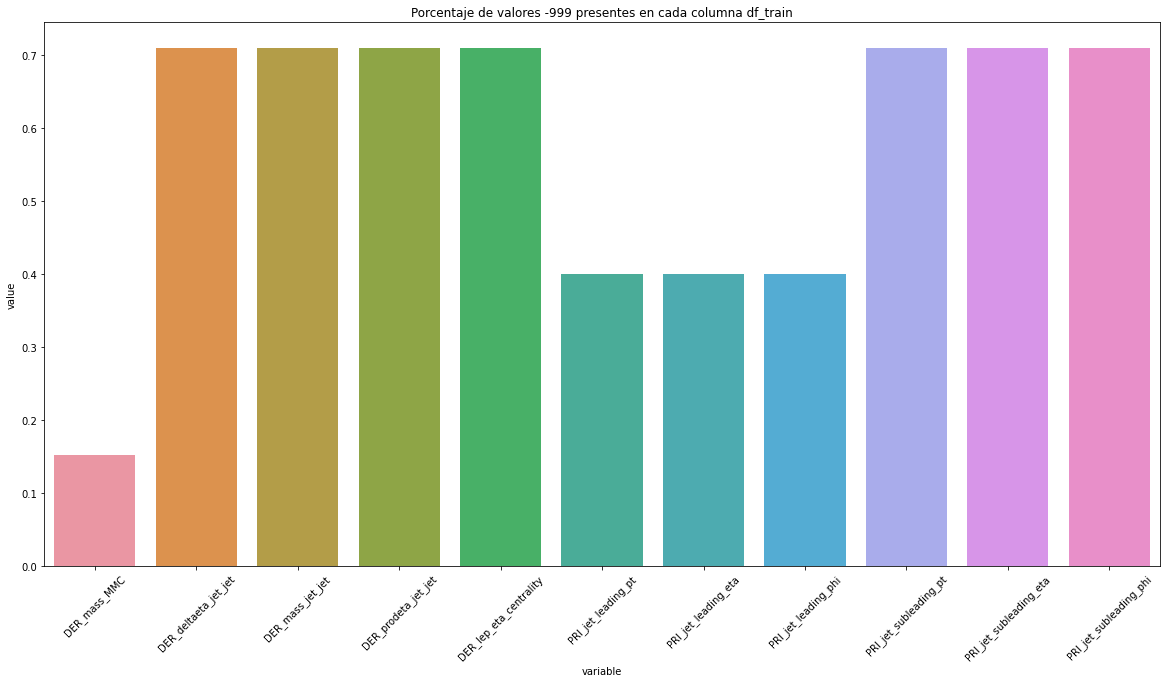

In [ ]:
count_percent = count.div(df_training.shape[0])
long_df = pd.melt(count_percent)
plt.figure(figsize=(20, 10))
sns.barplot(y = long_df.value , x = long_df.variable)
plt.title("Porcentaje de valores -999 presentes en cada columna df_train")
plt.xticks(rotation=45)
plt.show()

## Procesado

La columna EventId no aporta ninguna informacion por lo que la eliminamos. Lo mismo haremos con la columna Weight, que no es usada para la prediccion del label pero se utilizara para el calculo del puntaje conseguido (AMS)

In [ ]:
#La columna EventId no aporta ninguna informacion por lo que la eliminamos. 
df_training.drop(columns=["EventId"], inplace=True)
df_test.drop(columns=["EventId"], inplace=True)

#La columna Weights no es usada para la prediccion del label pero se utilizara para el calculo del puntaje conseguido
weight_train = higgs_train.pop("Weight")
weight_val = higgs_val.pop("Weight")
weight_test = higgs_test.pop("Weight")

#Las columnas KaggleSet y KaggleWeight son originarias de la pagina Kaggle por lo tanto no utiles
#para nosotros
higgs_test.drop(columns=["KaggleSet","KaggleWeight"], inplace=True)

Preprocesado

In [ ]:
#división de training set para el tuneo de hiperparámetros
df_training, df_val = train_test_split(df_training, train_size=0.8, test_size=0.2, random_state=SEED)
#_, df_test = train_test_split(df_test, test_size=1500, random_state=SEED)

In [ ]:
train_x = df_training.iloc[:,:30]
train_x = StandardScaler().fit_transform(train_x)
print("Training Data :", train_x.shape)

test_x = df_test.iloc[:,:30]
test_x = StandardScaler().fit_transform(test_x)
print("Testing Data :", test_x.shape)

train_y = df_training.iloc[:,30]
train_y = LabelEncoder().fit_transform(train_y)
print("Training Label :", train_y.shape)

test_y = df_test.iloc[:,30]
test_y = LabelEncoder().fit_transform(test_y)
print("Testing Label :", test_y.shape)

val_x = df_val.iloc[:,:30]
val_x = StandardScaler().fit_transform(val_x)
print("Validation Data :", val_x.shape)

val_y = df_val.iloc[:,30]
val_y = LabelEncoder().fit_transform(val_y)
print("Validation Data :", val_y.shape)

Training Data : (200000, 30)
Testing Data : (550000, 30)
Training Data : (200000,)
Testing Data : (550000,)
Training val Data : (50000, 30)
Testing val Data : (50000,)


#Parte 2: Entrenamiento

##Modelos usados:


*   Red Neuronal recurrente
*   decision tree
*   SVC
*   Catboost
*   Xgboost
*   Regresión lineal tarea 1
*   Red neuronal densa Tarea 2
*   Logistic regression
*   BernoulliNB 
*   Random Forest Classifier
*   RNN densa 2




In [ ]:
def score(y_true, y_pred, weights=weight_test):  
  b = 0
  s = 0

  for i in range(len(y_true)):
    if y_true[i] == 1 and y_pred[i] == 1:
      s += weights[i]
    elif y_true[i] == 0 and y_pred[i] == 1:
      b += weights[i]

  return ((2*(((s+b+10)*np.log(1+(s/(b+10)))-s)))**(1/2))

##Modelo 1: Red neuronal recurrente (RNN)

Modelo

In [ ]:
train_x_RNN = train_x.reshape(-1, 1, 30)
test_x_RNN = test_x.reshape(-1, 1, 30)
val_x_RNN = val_x.reshape(-1, 1, 30)

train_y_RNN = train_y.reshape(-1, 1,)
test_y_RNN = test_y.reshape(-1, 1,)
val_y_RNN = val_y.reshape(-1, 1,)

class_weight = {0: 1.,
                1: .5}

def score(y_true, y_pred, weights=weight_test):  
  b = 0.0
  s = 0.0
  
  for i in range(len(y_true)):
    if float(y_true[i]) >= 0.5 and float(y_pred[i]) == 1.0:
        s += float(weights[i])
    elif float(y_true[i]) < 0.5 and float(y_pred[i]) == 1.0:
        b += float(weights[i])
      
  return float(2*(((s+b+10)*np.log(1+(s/(b+10)))-s)))**(1/2)

def RNN(hp):

  input = Input(shape=(1,30))
  rnn = LSTM(hp.Choice('rnn', list(range(10, 100, 10))), return_sequences=True, recurrent_dropout=0.1)(input)
  rnn2 = LSTM(hp.Choice('rnn2', list(range(10, 100, 10))))(rnn)
  dense = Dense(hp.Choice('dense', list(range(2, 256, 1))))(rnn2)
  dropout = Dropout(hp.Choice('dropout', list(np.arange(0.2, 0.5, 0.01))))(dense)
  dense2 = Dense(1, activation='sigmoid')(dropout)
  model = Model(input, dense2)
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Recall(), Precision()])
  return model
  

Tuner

In [ ]:
tuner = kt.RandomSearch(
    RNN,
    objective= kt.Objective("precision", direction="max"),
    max_trials=20,
    overwrite = True)

  
tuner.search(train_x_RNN, train_y_RNN, epochs=10, batch_size=1000, class_weight=class_weight, validation_data=(val_x_RNN, val_y_RNN))
tuner.results_summary()

Trial 20 Complete [00h 00m 33s]
precision: 0.8557658195495605

Best precision So Far: 0.857530951499939
Total elapsed time: 00h 19m 16s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
rnn: 80
rnn2: 50
dense: 164
dropout: 0.3900000000000002
Score: 0.857530951499939
Trial summary
Hyperparameters:
rnn: 30
rnn2: 30
dense: 110
dropout: 0.3000000000000001
Score: 0.8566961884498596
Trial summary
Hyperparameters:
rnn: 50
rnn2: 20
dense: 116
dropout: 0.3100000000000001
Score: 0.8565554022789001
Trial summary
Hyperparameters:
rnn: 50
rnn2: 60
dense: 29
dropout: 0.3100000000000001
Score: 0.8565488457679749
Trial summary
Hyperparameters:
rnn: 30
rnn2: 80
dense: 104
dropout: 0.3900000000000002
Score: 0.8565366864204407
Trial summary
Hyperparameters:
rnn: 30
rnn2: 80
dense: 149
dropout: 0.4400000000000002
Score: 0.8562939167022705
Trial summary
Hyperparameters:
rnn: 30
rnn2: 30
dense: 9
dropout: 0.2900000000000001
Score: 0.8562072515487671
Trial summary
Hyperparameters:
rnn: 90
rnn2: 10
dense: 168
dropout: 0.26000000000000006
Score: 0.856153666973114
Trial summary
Hyperparameters:


Training

In [ ]:
best_hp = tuner.get_best_hyperparameters()[0]
model = tuner.hypermodel.build(best_hp)
RNNhistory = model.fit(train_x_RNN, train_y_RNN, epochs=15, batch_size=75, class_weight=class_weight, validation_data=(val_x_RNN, val_y_RNN))

Epoch 1/15
2667/2667 [==============================] - 25s 8ms/step - loss: 0.2707 - accuracy: 0.7993 - recall_1: 0.5089 - precision_1: 0.8408 - val_loss: 0.4154 - val_accuracy: 0.8094 - val_recall_1: 0.5305 - val_precision_1: 0.8684
Epoch 2/15
2667/2667 [==============================] - 19s 7ms/step - loss: 0.2542 - accuracy: 0.8153 - recall_1: 0.5565 - precision_1: 0.8514 - val_loss: 0.4102 - val_accuracy: 0.8147 - val_recall_1: 0.5518 - val_precision_1: 0.8642
Epoch 3/15
2667/2667 [==============================] - 19s 7ms/step - loss: 0.2512 - accuracy: 0.8184 - recall_1: 0.5664 - precision_1: 0.8528 - val_loss: 0.4236 - val_accuracy: 0.8053 - val_recall_1: 0.5065 - val_precision_1: 0.8812
Epoch 4/15
2667/2667 [==============================] - 19s 7ms/step - loss: 0.2492 - accuracy: 0.8206 - recall_1: 0.5728 - precision_1: 0.8543 - val_loss: 0.3988 - val_accuracy: 0.8178 - val_recall_1: 0.5563 - val_precision_1: 0.8715
Epoch 5/15
2667/2667 [==============================] - 20s 

Resultados

In [ ]:
pred = model.predict(test_x_RNN)

In [ ]:
model_predictions = [0 if i[0] < 0.5 else 1 if i[0] > 0.5 else np.random([0,1]) for i in pred]

In [ ]:
acc_RNN = accuracy_score(test_y_RNN, model_predictions)
prec_RNN = precision_score(test_y_RNN, model_predictions)
recall_RNN = recall_score(test_y_RNN, model_predictions)
amsRNN = score(test_y_RNN, model_predictions, weight_test)

In [ ]:
print("Accuracy score: ", acc_RNN)
print("Precision score: ", prec_RNN)
print("Recall score: ", recall_RNN)
print("AMS score:", amsRNN)

Accuracy score:  0.8153018181818181
Precision score:  0.8696943681318682
Recall score:  0.5396786498178021
AMS score: 2.704971037553986


##Modelo 2: Arboles 

**Un árbol de clasificación es un tipo de árbol de decisiones. Utiliza diferentes medidas de impurezas, como por ejemplo, Gini o entropy para clasificar los registros en las categorías del campo objetivo. Las predicciones se basan en combinaciones de valores en los campos de entrada.**

In [ ]:
df_training_2 = pd.read_csv("training.csv")
df_test_2 = pd.read_csv("test.csv")

In [ ]:
df_training_2 = df_training_2.drop(["PRI_jet_subleading_phi","PRI_jet_subleading_eta","PRI_jet_subleading_pt",
                            "PRI_jet_leading_phi","PRI_jet_leading_eta","PRI_jet_leading_pt","DER_lep_eta_centrality","DER_prodeta_jet_jet",
                            "DER_mass_jet_jet","DER_deltaeta_jet_jet","DER_mass_MMC","Weight"], axis=1)
                            
df_test_2 = df_test_2.drop(["PRI_jet_subleading_phi","PRI_jet_subleading_eta","PRI_jet_subleading_pt",
                            "PRI_jet_leading_phi","PRI_jet_leading_eta","PRI_jet_leading_pt","DER_lep_eta_centrality","DER_prodeta_jet_jet",
                            "DER_mass_jet_jet","DER_deltaeta_jet_jet","DER_mass_MMC","Weight", 'KaggleSet', 'KaggleWeight'], axis=1)

In [ ]:
df_train, df_val = train_test_split(df_training_2, test_size=0.002, random_state=SEED)

y_train = df_train["Label"]
y_val = df_val["Label"]
y_test = df_test["Label"]

df_train = df_train.drop(["Label"], axis=1)
df_val = df_val.drop(["Label"], axis=1)
df_test = df_test.drop(["Label"], axis=1)

df_train = StandardScaler().fit_transform(df_train)
df_val = StandardScaler().fit_transform(df_val)
df_test = StandardScaler().fit_transform(df_test)

y_train = y_train.apply(lambda x : 1 if (x == "s") else(0))
y_vald = y_val.apply(lambda x : 1 if (x == "s") else(0))
y_test = y_test.apply(lambda x : 1 if (x == "s") else(0))

In [ ]:
def calc_metrics(model, X_test, y_test, weight_test):

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred, normalize=True)
    macro_prec = precision_score(y_test, y_pred, average='macro')
    macro_rec = recall_score(y_test, y_pred, average='macro')
    macro_f1 = f1_score(y_test, y_pred, average='macro')
    Ams = score(y_test, y_pred, weight_test)

    return acc, macro_prec, macro_rec, macro_f1,Ams

def tune_params(model, param_dist, n_iter_search, X_v, y_v):
  random_search = RandomizedSearchCV(
      model, param_distributions=param_dist, n_iter=n_iter_search, scoring='f1_macro', random_state=2022
  )
  res = random_search.fit(X_v, y_v)
  return res

def conf_matrix(trained_model, X_test, y_test, title):
    
    labels = ['b', 's']
    y_pred = trained_model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred, labels=trained_model.classes_)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
    disp.plot()
    plt.title(title)
    plt.show()


NameError: ignored

In [ ]:
n_iter_search = 100
Tree_param_dist = {
        'criterion': ['giny', 'entropy', 'log_loss'],
        'splitter': ['best', 'random'],
        'max_features': ['sqrt', 'log2'],
        'ccp_alpha': stats.uniform(0, 1e-1)
    }
model = DecisionTreeClassifier()
res = tune_params(model, Tree_param_dist, n_iter_search, df_val, y_val)
best_parameters_Tree = res.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
345 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'giny'

--------------------------------------

In [ ]:
Tree_clf = DecisionTreeClassifier(**best_parameters_Tree, random_state=2022)
print(Tree_clf.fit(df_train,y_train))

DecisionTreeClassifier(ccp_alpha=0.004245099105805373, criterion='entropy',
                       max_features='sqrt', random_state=2022)


In [ ]:
acc_tree, macro_prec_tree, macro_rec_tree, macro_f1_tree, ams = calc_metrics(Tree_clf, df_test, y_test,weight_test)
print(acc_tree, macro_prec_tree, macro_rec_tree, macro_f1_tree, ams)

0.7117363636363636 0.6800372426309915 0.6814860403632967 0.6807333270346063 1.3122807295209968


- Accuaracy = $0.7117$
- Precision = $0.6800$
- Recall = $0.6814$
- **Ams** = $1.3122$

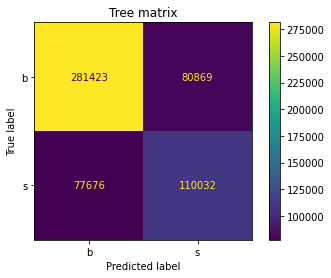

In [ ]:
conf_matrix(Tree_clf, df_test, y_test, "Tree matrix")
# conf_matrix(Rf_clf, df_test, y_test, "Random Forest matrix")

**Podemos observar que este modelo no desmuestra una decisión significativa al predecir signal, obteniendo $80869$, casos de falsos positivos, y solo $110032$ verdadros positivos.**

##Modelo 3: SVC

**El objetivo SVC (Support Vector Classifier) es de calzar o entrenar la data de tal forma que retorme la mejor forma de divir la data entre hyperplanos**

In [ ]:
n_iter_search = 30
SVC_param_dist = {
        'penalty': ['l1', 'l2'],
        'loss': ['hinge', 'squared_hinge'],
        'tol': stats.uniform(0, 1e-3),
        'C': stats.uniform(0.9, 1.1),
        'intercept_scaling': stats.uniform(0.9, 1.1),
}

model = LinearSVC()
res = tune_params(model, SVC_param_dist, n_iter_search, df_val, y_val)
best_parameters_SVC = res.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

In [ ]:
SVC_clf = LinearSVC(**best_parameters_SVC, random_state=SEED)
print(SVC_clf.fit(df_train,y_train))

LinearSVC(C=1.60030751102151, intercept_scaling=1.7484141834336244,
          loss='hinge', random_state=2022, tol=0.0007481559796525611)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
acc_SVC, macro_prec_SVC, macro_rec_SVC, macro_f1_SVC, amsSVC = calc_metrics(SVC_clf, df_test, y_test, weight_test)
print(acc_SVC, macro_prec_SVC, macro_rec_SVC, macro_f1_SVC, amsSVC)

0.7407254545454546 0.7109260200872243 0.6984021624490373 0.7033330195582106 1.6309876435385937


- Accuaracy = $0.7407$
- Precision = $0.7109$
- Recall = $0.6984$
- **Ams** = $1.6309$

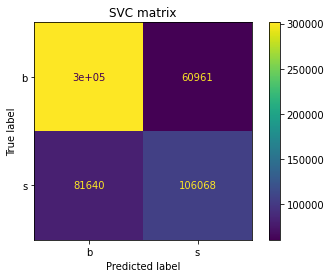

In [ ]:
conf_matrix(SVC_clf, df_test, y_test, "SVC matrix")

**Podemos observar que este modelo posee como gran fortaleza la predicción de background, acertando a gran cantidad de ellos, pero por su parte contraria no posee una capacidad de prediccion frente a las signal**

##Modelo 4: Catboost

**Como mencionan los autores de este algoritmo open source es una poderosa herramienta enfocada en gradient boosting basada en arboles de decisión, donde se generan una gran cantidad de diferentes arboles y generando a partir de estos resultados.**

In [ ]:
%pip install catboost

In [ ]:
import catboost as ctb
from sklearn.model_selection import GridSearchCV

cat_parameter = {'depth'         : [8,9, 10,12,16,18,20],
                 'learning_rate' : [0.02,0.03,0.04,0.1],
                  'iterations'    : [60,70,80,90, 100,150]
                 }

Cat_clf = ctb.CatBoostClassifier()
Grid_CBC = GridSearchCV(estimator=Cat_clf, param_grid = cat_parameter, cv = 2, n_jobs=-1)

print(Grid_CBC.fit(df_train, y_train))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
acc_Cat, macro_prec_Cat, macro_rec_Cat, macro_f1_Cat, amsCat = calc_metrics(Grid_CBC, df_test, y_test, weight_test)
print(acc_Cat, macro_prec_Cat, macro_rec_Cat, macro_f1_Cat, amsCat)

0.82698 0.8127138673470633 0.794643615571194 0.8021736575983995 2.289354388527591


- Accuaracy = $0.8269$
- Precision = $0.8127$
- Recall = $0.7946$
- **Ams** = $2.2893$

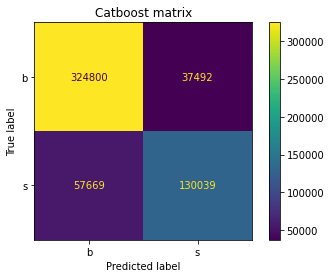

In [ ]:
conf_matrix(Grid_CBC, df_test, y_test, "Catboost matrix")

**Podemos observar que este modelo presenta una mejora frente a los anteriores dos en la preduccion de signal, obtenindo una mejora razonable a estos y fallando unicamente $37492$ para falsos positivos. Manteniendo una margen aceptable para predecir background**

## Modelo 5: XGBoost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

default_params = {}
xgbc0 = xgb.XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='auc',
                          tree_method='hist',
                          grow_policy='lossguide',
                          use_label_encoder=False)
xgbc0.fit(df_train , y_train)
gparams = xgbc0.get_params()

for key in gparams.keys():
    gp = gparams[key]
    default_params[key] = [gp]

clf0 = GridSearchCV(estimator=xgbc0, scoring='accuracy', param_grid=default_params, return_train_score=True, verbose=1, cv=10)
clf0.fit(df_tra, y_val)


# xgb_classifier.fit(df_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(eval_metric='auc', grow_policy='lossguide',
                                     tree_method='hist',
                                     use_label_encoder=False),
             param_grid={'base_score': [0.5], 'booster': ['gbtree'],
                         'colsample_bylevel': [1], 'colsample_bynode': [1],
                         'colsample_bytree': [1], 'eval_metric': ['auc'],
                         'gamma': [0], 'grow_policy': ['lossguide'],
                         'learning_rate': [0.1], 'max_delta_step...
                         'max_depth': [3], 'min_child_weight': [1],
                         'missing': [None], 'n_estimators': [100],
                         'n_jobs': [1], 'nthread': [None],
                         'objective': ['binary:logistic'], 'random_state': [0],
                         'reg_alpha': [0], 'reg_lambda': [1],
                         'scale_pos_weight': [1], 'seed': [None],
                     

In [ ]:
acc_xgb, macro_prec_xgb, macro_rec_xgb, macro_f1_cgb, amscgb = calc_metrics(clf0, df_test, y_test, weight_test)
print(acc_xgb, macro_prec_xgb, macro_rec_xgb, macro_f1_cgb, amscgb)

0.8172163636363636 0.8003961201781765 0.7854058902568473 0.7917789325299376 2.167046216432362


- Accuaracy = $0.8172$
- Precision = $0.8003$
- Recall = $0.7854$
- **Ams** = $2.1670$

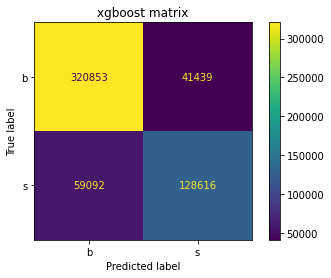

In [ ]:
conf_matrix(clf0, df_test, y_test, "xgboost matrix")

**Podemos observar que este modelo se asemeja al catboost manteniendo distribuciones de error similar, pero simplemente de una manera menos eficaz**

## Modelo 6: Ridge Classifier

### Tuning

In [ ]:
opt = BayesSearchCV(RidgeClassifier(),
    {
       'alpha': Real(1e-6, 1e+6, prior='log-uniform'),
    },
    n_iter=32,
    cv=StratifiedKFold(n_splits=10)
)

opt.fit(val_x, val_y)

print(opt.best_params_)

OrderedDict([('alpha', 7.3683021251371145e-06)])


### Model

In [ ]:
params = dict(opt.best_params_)

alpha_tunned = params['alpha']

model = RidgeClassifier(alpha=alpha_tunned, class_weight='balanced')
model.fit(train_x, train_y)

y_hat = model.predict(test_x)

### Results

In [ ]:
print("Accuracy score: ", accuracy_score(test_y, y_hat))
print("Precision score: ", precision_score(test_y, y_hat))
print("Recall score: ", recall_score(test_y, y_hat))
print("AMS score: ", score(test_y, y_hat, weight_test))

Accuracy_score:  0.7288145454545455
Precision_score:  0.5767925430210326
Recall_score:  0.7714002599782641
AMS score:  1.6005925735707345


## Modelo 7: Red Neuronal Densa

In [ ]:
#división features y target
#preprocesamiento de los features

#Training Data
norm_1 = df_training.iloc[:,:22]
norm_2 = def_training.iloc[:,23:30]
ord = def_training.iloc[:,22]

norm_1 = StandardScaler().fit_transform(norm_1)
norm_2 = StandardScaler().fit_transform(norm_2)
ord = OrdinalEncoder().fit_transform(np.array(ord).reshape(-1,1))

train_x_2 = np.append(np.append(norm_1, ord, axis=1), norm_2, axis=1)

print("Training Data :", train_x.shape)

#Validation Data
norm_1 = df_val.iloc[:,:22]
norm_2 = df_val.iloc[:,23:30]
ord = df_val.iloc[:,22]

norm_1 = StandardScaler().fit_transform(norm_1)
norm_2 = StandardScaler().fit_transform(norm_2)
ord = OrdinalEncoder().fit_transform(np.array(ord).reshape(-1,1))

val_x_2 = np.append(np.append(norm_1, ord, axis=1), norm_2, axis=1)

print("Validation Data :", val_x.shape)

#Testing data
norm_1 = df_test.iloc[:,:22]
norm_2 = df_test.iloc[:,23:30]
ord = df_test.iloc[:,22]

norm_1 = StandardScaler().fit_transform(norm_1)
norm_2 = StandardScaler().fit_transform(norm_2)
ord = OrdinalEncoder().fit_transform(np.array(ord).reshape(-1,1))

test_x_2 = np.append(np.append(norm_1, ord, axis=1), norm_2, axis=1)

print("Testing Data :", test_x.shape)

### Tuning

In [ ]:
def model_builder(hp):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.GaussianNoise(hp.Float('stddev', min_value=0, max_value=5, step=1),
                                          input_shape=(30,),
                                          seed=SEED))
  # Tune the number of dense layers
  for i in range(hp.Int('num_layers', 1, 5)):
    
    # Tune the number of units in the each dense layer
    hp_units = hp.Int('units_'+str(i), min_value=30, max_value=90, step=30)
    hp_activation = hp.Choice('act_'+str(i), ['relu', 'tanh', 'sigmoid'])
    model.add(tf.keras.layers.Dense(units=hp_units, activation=hp_activation))
    
    # Tune the dropout rate in the each dense layer
    if hp.Boolean("dropout"):
      hp_dropout = hp.Float('rate', min_value=0.0, max_value=0.5, step=0.1)
      model.add(tf.keras.layers.Dropout(hp_dropout))
      
  # Add dense output layer
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

  # Tune the learning rate for the optimizer
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss='binary_crossentropy',
                metrics=tf.keras.metrics.Recall())

  return model

In [ ]:
tuner = kt.RandomSearch(
    hypermodel=model_builder,
    objective=kt.Objective('val_recall', 'max'),
    max_trials=5,
    executions_per_trial=3,
    overwrite=True,
)

In [ ]:
tuner.search(
    x=train_x_2,
    y=train_y_2,
    validation_data=(val_x_2, val_y_2),
    class_weight={0: 1., 1: .33}
)

Trial 5 Complete [00h 00m 55s]
val_recall: 0.021714062429964542

Best val_recall So Far: 0.4371543029944102
Total elapsed time: 00h 05m 36s


### Model

In [ ]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the optimal hyperparameters and train it on the data for 50 epochs

model = tuner.hypermodel.build(best_hps)
history = model.fit(train_x_2, train_y_2, epochs=100, batch_size=5000, validation_data=(val_x_2, val_y_2), class_weight={0: 1., 1: .33})

### Results

In [ ]:
pred = model.predict(test_x_2)

In [ ]:
model_predictions = [0 if i[0] < 0.5 else 1 if i[0] > 0.5 else np.random([0,1]) for i in pred]

In [ ]:
print("Accuracy score: ", accuracy_score(test_y_2, model_predictions))
print("Precision score: ", precision_score(test_y_2, model_predictions))
print("Recall score: ", recall_score(test_y_2, model_predictions))
print("AMS score:", score(test_y_2, model_predictions, weight_test))

Accuracy score:  0.80546
Precision score:  0.8866469297615284
Recall score:  0.4930104204402583
AMS score: 2.725804054049669


## Modelo 8: Logistic Regression

### Tuning

In [ ]:
res = RandomizedSearchCV(
      LogisticRegression(), 
      {
          'C': stats.loguniform(1e-6,1e+6),
          'solver': Categorical(['newton-cg', 'liblinear']),
          
      }, 
      n_iter=32,
      cv = StratifiedKFold(n_splits=10)
  )

opt = res.fit(val_x, val_y)

print(opt.best_params_)

{'C': 1128.7636564212064, 'solver': 'liblinear'}


### Model

In [ ]:
params = dict(opt.best_params_)

C_tunned = params['C']
solver_tunned = params['solver']

model = LogisticRegression(C=C_tunned, solver=solver_tunned, class_weight='balanced')
model.fit(train_x, train_y)

y_hat = model.predict(test_x)

### Results

In [ ]:
print("Accuracy score: ", accuracy_score(test_y, y_hat))
print("Precision score: ", precision_score(test_y, y_hat))
print("Recall score: ", recall_score(test_y, y_hat))
print("AMS score: ", score(test_y, y_hat, weight_test))

Accuracy score:  0.7343818181818181
Precision score:  0.5839878593166022
Recall score:  0.7708248982462123
AMS score:  1.640806777482906


##Modelo 9: Bernoulli Naive Bayes

Tuning

In [ ]:
opt = BayesSearchCV(
    BernoulliNB(),
    {
        'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000],
    },
    n_iter=32,
    cv=StratifiedKFold(n_splits=10)
)

opt.fit(val_x, val_y)

print(opt.best_params_)

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packa

OrderedDict([('alpha', 10.0)])


Modelo

In [ ]:
params = dict(opt.best_params_)
alpha_tunned = params['alpha']

BNBModel = BernoulliNB(alpha =alpha_tunned)
BNBModel.fit(train_x, train_y)

BernoulliNB(alpha=10.0)

Resultados

In [ ]:
pred = BNBModel.predict(test_x)
acc_BNB = accuracy_score(test_y, pred)
prec_BNB = precision_score(test_y, pred)
recall_BNB = recall_score(test_y, pred)
ams_BNB = score(test_y, pred, weight_test)

In [ ]:
print("Accuracy score: ", acc_BNB)
print("Precision score: ", prec_BNB )
print("Recall score: ", recall_BNB)
print("AMS score:", ams_BNB)

Accuracy score:  0.6469872727272727
Precision score:  0.4849724802281741
Recall score:  0.5543823385257954
AMS score: 0.8226763012160342


##Modelo 10: Random Forest

In [ ]:
higgs_train = pd.read_csv('training.csv') 
higgs_test = pd.read_csv('test.csv') 

# random forest no acepta valores nan por lo que se reemplazan los -999 con 0
higgs_test = higgs_test.replace(-999.0,0)
higgs_train = higgs_train.replace(-999.0,0)

# se eliminan columnas uniformes
higgs_train = higgs_train.drop(["PRI_tau_phi", "PRI_met_phi", "PRI_lep_phi", "Weight"], axis=1)
higgs_test = higgs_test.drop(["PRI_tau_phi", "PRI_met_phi", "PRI_lep_phi", "Weight", "KaggleSet", "KaggleWeight"], axis=1)

def forestPreprocess(df):
  label = LabelEncoder()
  std = StandardScaler()

  for col in df:
    if col == "Label":
      df[col] = label.fit_transform(df[col])
      df[col] = df[col].replace(0,-1)
    else:
      df[col] = std.fit_transform(np.array(df[col]).reshape(-1,1))

  return df

new_forest_training = forestPreprocess(higgs_train)
new_forest_test = forestPreprocess(higgs_test)

forestLabels = np.array(new_forest_training['Label'])
new_forest_training = new_forest_training.drop('Label', axis = 1)
forest_train_features, forest_val_features , forest_train_labels, forest_val_labels = train_test_split(new_forest_training, forestLabels, test_size = 0.20, random_state = SEED)

###Tuning

In [ ]:
# parametros de random forest son elegidos aleatoriamente de un conjunto
n_estimators = [int(x) for x in np.linspace(start = 400, stop = 1000, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 80, num = 4)]
max_depth.append(None)
min_samples_split = [2, 4, 8]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [400, 550, 700, 850, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 33, 56, 80, None], 'min_samples_split': [2, 4, 8], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, random_state=SEED)

rf_random.fit(forest_train_features, forest_train_labels)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 33, 56, 80, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 8],
                                        'n_estimators': [400, 550, 700, 850,
                                                         1000]},
                   random_state=42069, verbose=10)

In [ ]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 56,
 'bootstrap': False}

In [ ]:
b_p_f = dict(rf_random.best_params_)
best_rf = RandomForestRegressor(n_estimators = b_p_f["n_estimators"],
 min_samples_split = b_p_f["min_samples_split"],
 min_samples_leaf = b_p_f["min_samples_leaf"],
 max_features= b_p_f["max_features"],
 max_depth= b_p_f["max_depth"],
 bootstrap= b_p_f["bootstrap"], random_state = SEED)
best_rf.fit(forest_train_features, forest_train_labels);

In [ ]:
f_test_labels = np.array(higgs_test['Label'])
f_test= higgs_test.drop('Label', axis = 1)
y_predicted_label = best_rf.predict(f_test)
f_predict = np.copy(y_predicted_label)
f_predict[f_predict < 0] = -1
f_predict[f_predict >= 0] = 1

In [ ]:
forest_acc = accuracy_score(f_test_labels, f_predict)
forest_prec = precision_score(f_test_labels, f_predict)
forest_recall = recall_score(f_test_labels, f_predict)
forest_ams = score(f_test_labels, f_predict, weight_test)
print("Accuracy score: ", forest_acc)
print("Precision score: ", forest_prec)
print("Recall score: ", forest_recall)
print("AMS score:", forest_ams)

Accuracy score:  0.8403636363636363
Precision score:  0.7932054562956354
Recall score:  0.7199480043471775
AMS score: 2.3640845522598246


In [ ]:
def forest_conf_matrix(y_test, y_pred, title):
    
    labels = [-1, 1]

    cm = confusion_matrix(y_test, y_pred, labels=labels)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
    disp.plot()
    plt.title(title)
    plt.show()


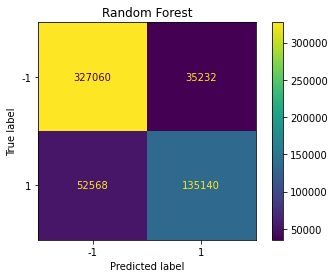

In [ ]:
forest_conf_matrix(f_test_labels, f_predict, "Random Forest")

## Modelo 11: Red Neuronal Densa 2

In [ ]:
def build_model_2(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.GaussianNoise(stddev=0,
                                          input_shape=(30,),
                                          seed=SEED))
    
    # Tune the number of layers.
    for i in range(hp.Int("num_layers", 1, 3)):
        hp_units = hp.Int('units_'+str(i), min_value=30, max_value=512, step=32)
        hp_activation = hp.Choice('act_'+str(i), ['relu', 'tanh', 'sigmoid'])
        model.add(tf.keras.layers.Dense(units=hp_units, activation=hp_activation))

    if hp.Boolean("dropout"):
        model.add(tf.keras.layers.Dropout(rate=0.25))
    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
    optimizer=hp.Choice("optimizer", ["adam", "RMSprop"])
    model.compile(
        optimizer=optimizer,
        loss="binary_crossentropy",
        metrics=tf.keras.metrics.Precision(),
    )
    return model

In [ ]:
tuner = kt.Hyperband(
    hypermodel=build_model_2,
    objective=kt.Objective('val_precision', 'max'),
    overwrite=True,
    max_epochs=4
)

In [ ]:
tuner.search(
    x=train_x_2,
    y=train_y_2,
    validation_data=(val_x_2, val_y_2),
    class_weight={0: 1., 1: .33},
    batch_size=100,
)

Trial 10 Complete [00h 01m 08s]
val_precision: 0.9028193354606628

Best val_precision So Far: 0.9077385663986206
Total elapsed time: 00h 07m 17s


In [ ]:
for hp in tuner.get_best_hyperparameters()[0].values:
  print(hp, " ", tuner.get_best_hyperparameters()[0].values[hp])

num_layers   2
units_0   382
act_0   sigmoid
dropout   False
optimizer   RMSprop
units_1   286
act_1   relu
units_2   350
act_2   sigmoid
tuner/epochs   2
tuner/initial_epoch   0
tuner/bracket   1
tuner/round   0


In [ ]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the optimal hyperparameters and train it on the data for 100 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_x_2, train_y_2, epochs=100, batch_size=5000, validation_data=(val_x_2, val_y_2), class_weight={0: 1., 1: .33})

Epoch 1/100
40/40 [==============================] - 5s 108ms/step - loss: 0.3163 - precision_1: 0.7247 - val_loss: 0.7761 - val_precision_1: 0.4000
Epoch 2/100
40/40 [==============================] - 4s 101ms/step - loss: 0.2839 - precision_1: 0.7891 - val_loss: 0.7754 - val_precision_1: 0.6818
Epoch 3/100
40/40 [==============================] - 4s 102ms/step - loss: 0.2722 - precision_1: 0.8077 - val_loss: 0.6784 - val_precision_1: 0.9324
Epoch 4/100
40/40 [==============================] - 4s 100ms/step - loss: 0.2624 - precision_1: 0.8348 - val_loss: 0.6025 - val_precision_1: 0.9168
Epoch 5/100
40/40 [==============================] - 5s 114ms/step - loss: 0.2518 - precision_1: 0.8486 - val_loss: 0.6109 - val_precision_1: 0.9298
Epoch 6/100
40/40 [==============================] - 5s 118ms/step - loss: 0.2421 - precision_1: 0.8631 - val_loss: 0.5722 - val_precision_1: 0.9334
Epoch 7/100
40/40 [==============================] - 4s 102ms/step - loss: 0.2349 - precision_1: 0.8717 - 

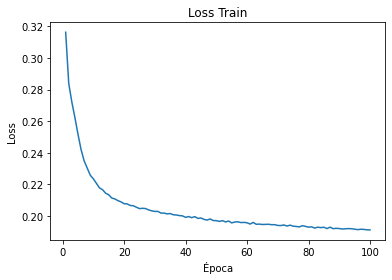

In [ ]:
# Loss
plt.plot(range(1,101), history.history['loss'])
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Loss Train")
plt.show()

In [ ]:
pred = model.predict(test_x_2)

In [ ]:
model_predictions = [0 if i[0] < 0.5 else 1 if i[0] > 0.5 else np.random([0,1]) for i in pred]

In [ ]:
print("Accuracy score: ", accuracy_score(test_y_2, model_predictions))
print("Precision score: ", precision_score(test_y_2, model_predictions))
print("Recall score: ", recall_score(test_y_2, model_predictions))
print("AMS score:", score(test_y_2, model_predictions, weight_test))

Accuracy score:  0.8189745454545454
Precision score:  0.8644784068542318
Recall score:  0.5568809001214653
AMS score: 2.6390408862525763


## Parte 3: Resultados Finales

In [ ]:
"""
RESULTADOS ENTREGADOS EN LA PRESENTACION
resultados_all = {"Rnn Recurrente" : [0.8153018181818181, 0.8696943681318682, 0.5396786498178021, 2.704971037553986],
                  "Arbol de Clasificación" : [0.7117363636363636, 0.6800372426309915, 0.6814860403632967, 1.3122807295209968],
                  "SVc" : [0.7407254545454546 ,0.7109260200872243 ,0.6984021624490373 , 1.6309876435385937],
                  "Catboost" : [0.82698 , 0.8127138673470633 ,0.794643615571194, 2.289354388527591],
                  "XGBoost" : [0.8172163636363636, 0.8003961201781765, 0.7854058902568473, 2.167046216432362],
                  "Ridge" : [0.7288145454545455, 0.5767925430210326, 0.7714002599782641, 1.6005925735707345],
                  "Rnn Capas Densas" : [0.80546, 0.8866469297615284,  0.4930104204402583, 2.725804054049669],
                  "Rnn Capas Densas2" : [0.8189745454545454,0.8644784068542318,  0.5568809001214653, 2.6390408862525763],
                  "Random Forest" : [0.8403636363636363, 0.7932054562956354, 0.7199480043471775, 2.3640845522598246],
                  "Logistic Regression" : [0.7343818181818181, 0.5839878593166022,  0.7708248982462123, 1.640806777482906],
                  "Bernuilli Naive Bayes" : [0.6469872727272727, 0.4849724802281741, 0.5543823385257954, 0.8226763012160342]
                  }
"""
resultados_all = {"Rnn Recurrente" : [acc_RNN, prec_RNN, recall_RNN, amsRNN],
                  "Arbol de Clasificación" : [0.7117363636363636, 0.6800372426309915, 0.6814860403632967, 1.3122807295209968],
                  "SVc" : [0.7407254545454546 ,0.7109260200872243 ,0.6984021624490373 , 1.6309876435385937],
                  "Catboost" : [0.82698 , 0.8127138673470633 ,0.794643615571194, 2.289354388527591],
                  "XGBoost" : [0.8172163636363636, 0.8003961201781765, 0.7854058902568473, 2.167046216432362],
                  "Ridge" : [0.7288145454545455, 0.5767925430210326, 0.7714002599782641, 1.6005925735707345],
                  "Rnn Capas Densas" : [0.80546, 0.8866469297615284,  0.4930104204402583, 2.725804054049669],
                  "Rnn Capas Densas2" : [0.8189745454545454,0.8644784068542318,  0.5568809001214653, 2.6390408862525763],
                  "Random Forest" : [0.8403636363636363, 0.7932054562956354, 0.7199480043471775, 2.3640845522598246],
                  "Logistic Regression" : [0.7343818181818181, 0.5839878593166022,  0.7708248982462123, 1.640806777482906],
                  "Bernuilli Naive Bayes" : [acc_BNB, prec_BNB, recall_BNB, ams_BNB]
                  }

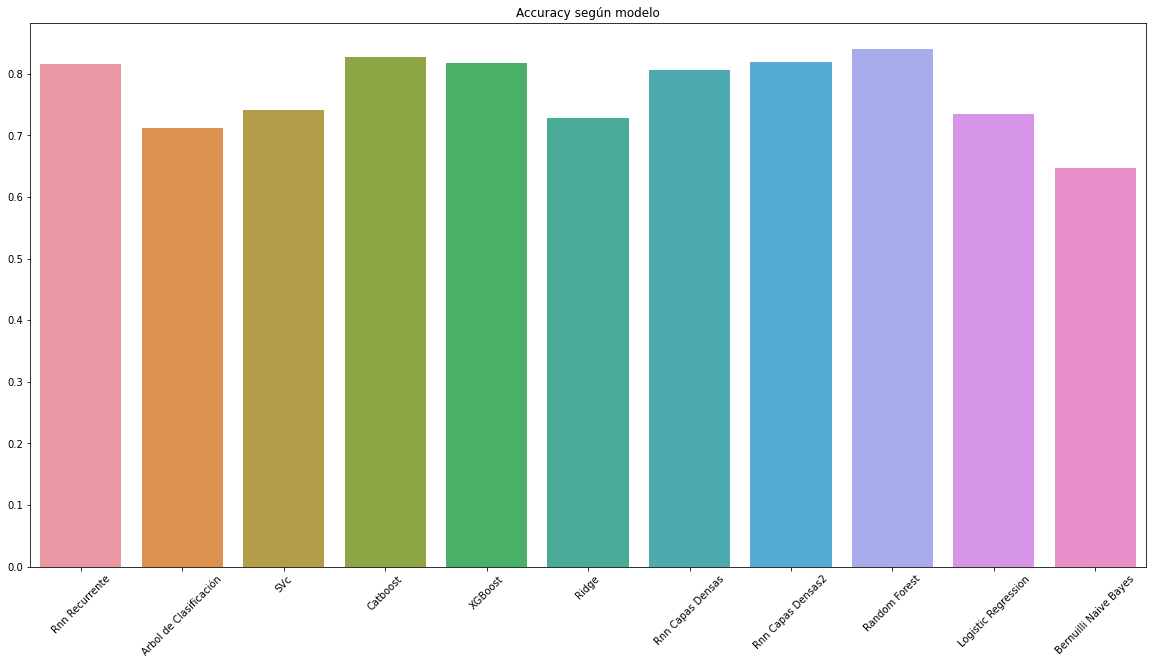

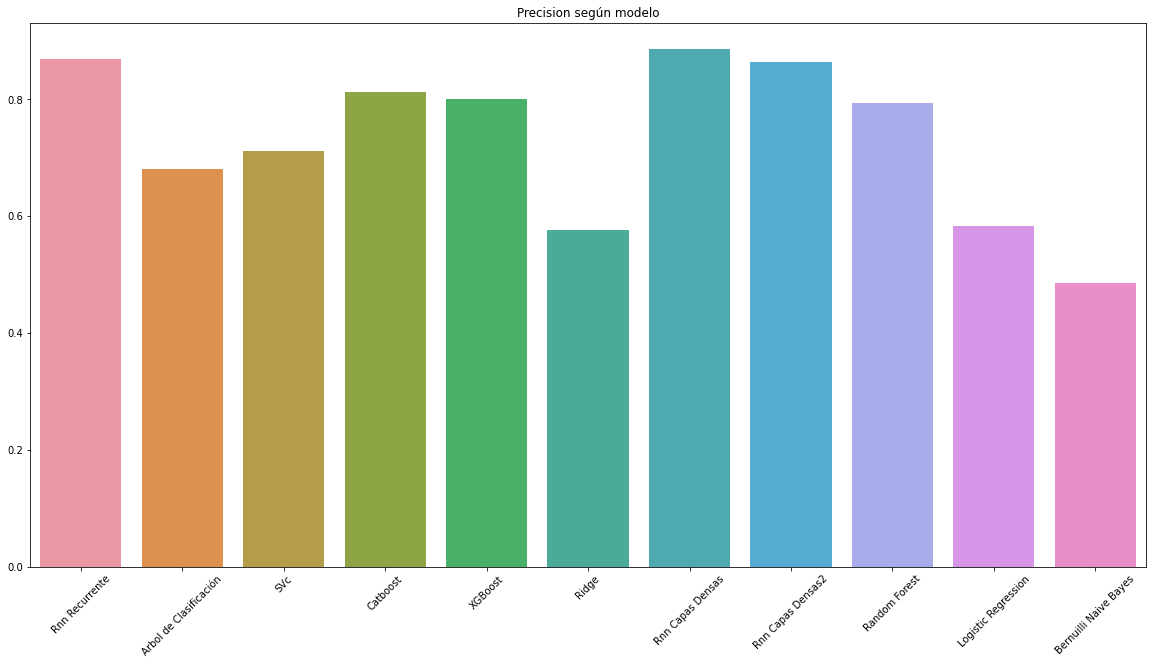

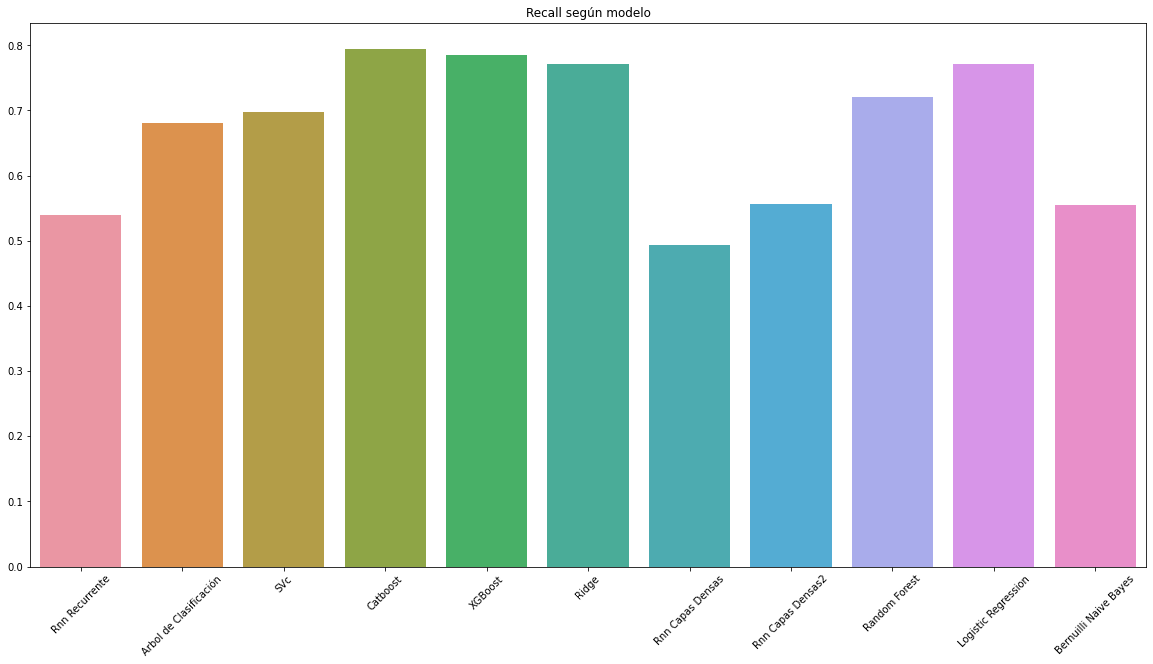

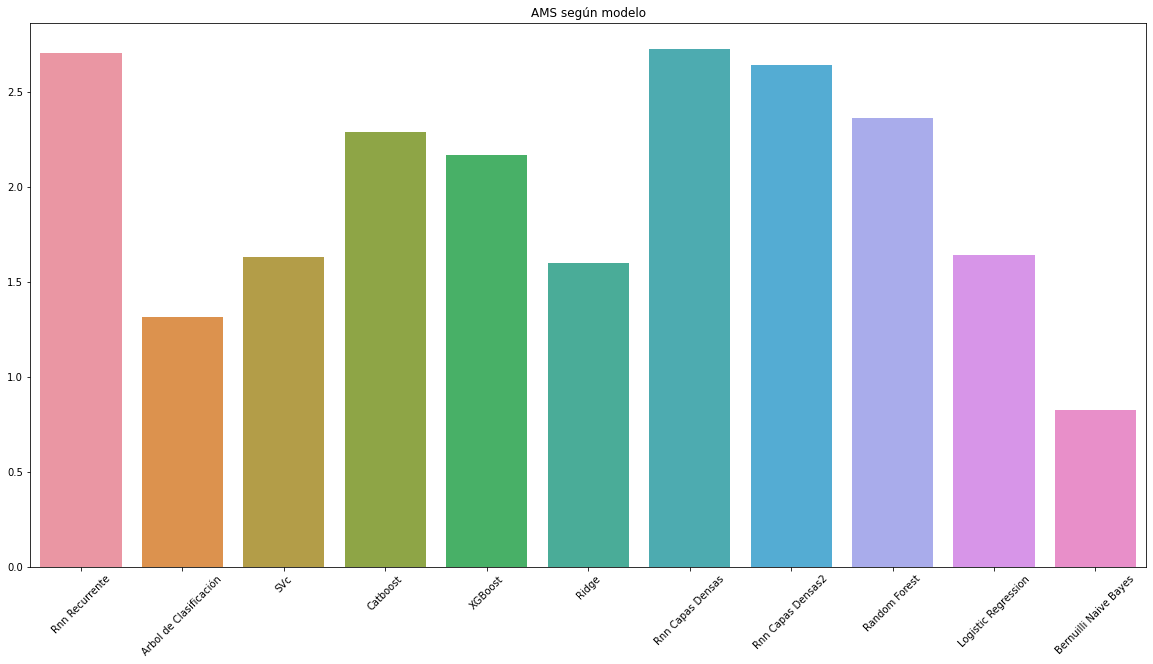

In [ ]:
score_names = ["Accuracy", "Precision", "Recall", "AMS" ]

for i in range(4):
  plt.figure(figsize=(20, 10))
  sns.barplot(y = [l[i] for l in resultados_all.values()], x = list(resultados_all.keys()) )
  plt.title(score_names[i] + " según modelo")
  plt.xticks(rotation=45)
  plt.show()
  print(" ")

**A simple vista podemos observar la metrica de precision posee una correlación frente al score del dataset AMS.**

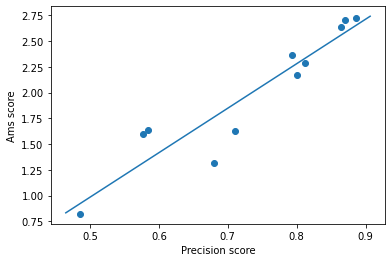

In [ ]:
data2 = []
for value in resultados_all.values():
  data2.append((value[1],value[3]))

x_val = [x[0] for x in data2]
y_val = [x[1] for x in data2]

plt.scatter(x_val,y_val)
plt.xlabel('Precision score')
plt.ylabel('Ams score')

axes = plt.gca()
m, b = np.polyfit(x_val, y_val, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-')

# plt.plot(x_val,y_val,')
plt.show()

**Dado este grafico se observa claramente que independiente del modelo siguen esta relación entre la precision y el AMS.**

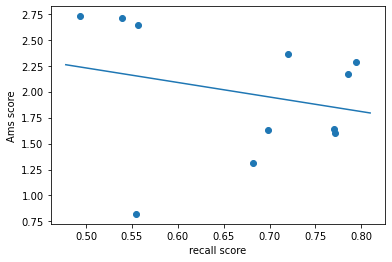

In [ ]:
data3 = []
for value in resultados_all.values():
  data3.append((value[2],value[3]))
  
x_val = [x[0] for x in data3]
y_val = [x[1] for x in data3]

plt.scatter(x_val,y_val)
plt.xlabel('recall score')
plt.ylabel('Ams score')

axes = plt.gca()
m, b = np.polyfit(x_val, y_val, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-')

# plt.plot(x_val,y_val,')
plt.show()

**No se logra definir una relación clara entre el AMS y el recall score, pero si se observa que las redes neuronales posen un bajo recall, a pesar de ser los mejores modelos frente al AMS, esto se debe a un gran nivel de falsos negativos por parte de estos modelos.**

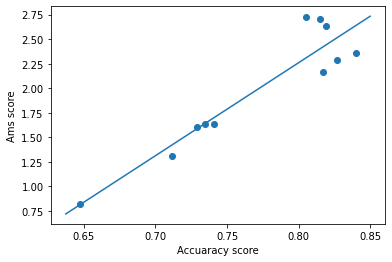

In [ ]:
data4 = []
for value in resultados_all.values():
  data4.append((value[0],value[3]))
  
x_val = [x[0] for x in data4]
y_val = [x[1] for x in data4]

plt.scatter(x_val,y_val)
plt.xlabel('Accuaracy score')
plt.ylabel('Ams score')

axes = plt.gca()
m, b = np.polyfit(x_val, y_val, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-')

# plt.plot(x_val,y_val,')
plt.show()

**Existe una baja variación en nuestra puntuación accuaracy, donde gran parte de nuestro modelos posee una puntuación similar. Por lo que finalmente los modelos se encuentran mayormente recompensados por la eficacia al detectar las signal, dada la naturaleza de nuestra metrica.**

**Nuestro mejor modelo dio un puntaje de 2.72 aproximadamente que nos dejaría en la posición 1257 de la tabla de clasificación private de Kaggle.**

###Conclusión

**Los modelos basados en redes neuronales nos entregaron los mejores resultados en el score AMS dado el preprocesamiento generado para ellos, obteniendo mejores resultados al no eliminar las columnas con -999 presentes y tampoco generando imputaciones para estos valores. Mientras que para modelos como SVC o gradient booster, era contraprudecente desarrollar los modelos con estas columnas o generar imputaciones de estos valores**.